---
title: Welcome to Lasers and Optomechanics!
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
---

In [19]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

interactive(children=(FloatSlider(value=1.0, description='ww', max=3.0, min=-1.0), FloatSlider(value=0.0, desc…

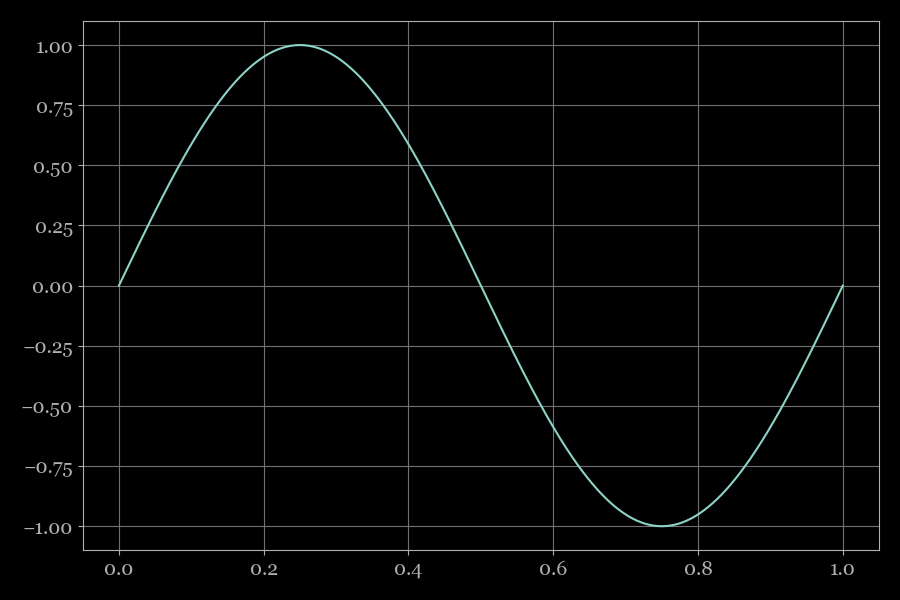

In [21]:
xx = np.linspace(0, 1, 1000)
kk = 2 * np.pi 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(xx, np.sin(kk * xx))
ax.grid()

def update(ww = 1.0, theta = (-np.pi, np.pi)):
    line.set_ydata(np.sin(ww  * kk * xx + theta))
    fig.canvas.draw_idle()

interact(update);

# Phasors and Complex Numbers Review

Here we will review complex numbers, as they will form the basis of the math in this course.  
In short, it is often convenient to express light fields as complex quantities, although all electric fields and magnetic fields associated with light must be *real-valued* in the end.
Typically, this can easily be achieved by simply taking the real part of the complex quantity,
or by strategically 



interactive(children=(FloatSlider(value=0.0, description='θ (rad):', max=6.283185307179586, readout_format='.3…

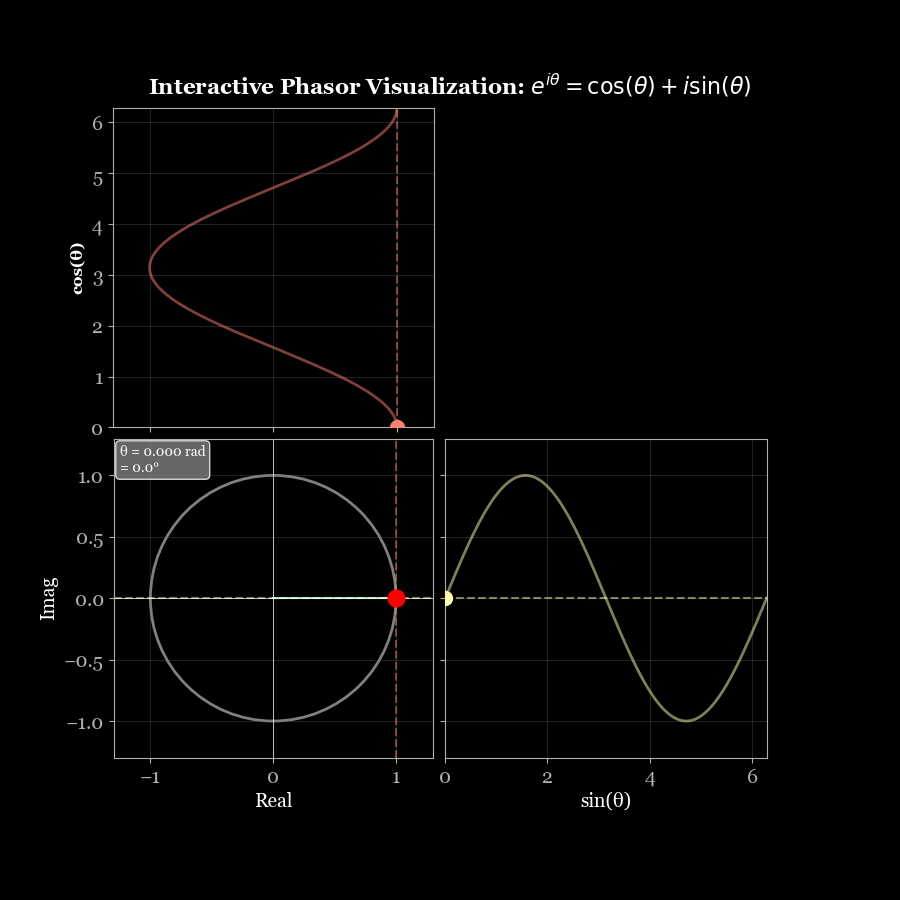

In [22]:
#| label: unit_phasor
#| "tags": [ "hide-input",]

# Create figure with custom layout
fig = plt.figure(figsize=(9, 9))
fig.set_tight_layout(False)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.1], width_ratios=[1, 1, 0.1],
                      hspace=0.05, wspace=0.05)

# Create subplots
ax_cos = fig.add_subplot(gs[0, 0])      # Cosine plot (top)
ax_phasor = fig.add_subplot(gs[1, 0])  # Phasor plot (center)
ax_sin = fig.add_subplot(gs[1, 1])     # Sine plot (right)

theta = 0 # initial values

cos_val = np.cos(theta)
sin_val = np.sin(theta)

# Generate full curves
theta_range = np.linspace(0, 2*np.pi, 1000)
cos_curve = np.cos(theta_range)
sin_curve = np.sin(theta_range)

# Setup cosine plot (top)
ax_cos.plot(cos_curve, theta_range, '-', color='C3', linewidth=2, alpha=0.5)
cos_dot,     = ax_cos.plot([cos_val], [theta], 'o', color='C3', markersize=10, zorder=5)
cos_val_line = ax_cos.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)

ax_cos.set_xlim(-1.3, 1.3)
ax_cos.set_ylim(0, 2*np.pi)
ax_cos.set_ylabel('cos(θ)', fontsize=12, fontweight='bold')
ax_cos.grid(True, alpha=0.3)
ax_cos.axhline(0, linewidth=0.5)
ax_cos.set_xticklabels([])

# Setup phasor plot (center)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linewidth=2)
ax_phasor.add_patch(circle)

# Draw phasor arrow
# arrow = FancyArrowPatch((0, 0), (cos_val, sin_val),
#                        arrowstyle='->', mutation_scale=20, 
#                        linewidth=3, color='red', zorder=4)
# ax_phasor.add_patch(arrow)

phasor_line, = ax_phasor.plot([0,cos_val],[0,sin_val])
phasor_sin_line = ax_phasor.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
phasor_cos_line = ax_phasor.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)
phasor_dot, = ax_phasor.plot([cos_val], [sin_val], 'ro', markersize=12, zorder=5)

ax_phasor.set_xlim(-1.3, 1.3)
ax_phasor.set_ylim(-1.3, 1.3)
ax_phasor.set_aspect('equal')
ax_phasor.axhline(0, linewidth=0.5)
ax_phasor.axvline(0, linewidth=0.5)
ax_phasor.set_xlabel('Real')
ax_phasor.set_ylabel('Imag')
ax_phasor.grid(True, alpha=0.3)
# ax_phasor.set_title('Phasor: $e^{i\\theta}$', fontsize=14, pad=10, fontweight='bold')

# Add text annotation
ax_phasor.text(0.02, 0.98, f'θ = {theta:.3f} rad\n= {np.degrees(theta):.1f}°',
               transform=ax_phasor.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='grey', alpha=0.8),
               fontsize=10)

# Setup sine plot (right)
ax_sin.plot(theta_range, sin_curve, color="C1", linewidth=2, alpha=0.5)
sin_dot, = ax_sin.plot([theta], [sin_val], 'o', color="C1", markersize=10, zorder=5)
sin_val_line = ax_sin.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
ax_sin.set_xlim(0, 2*np.pi)
ax_sin.set_ylim(-1.3, 1.3)
ax_sin.set_xlabel('sin(θ)')
# ax_sin.set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax_sin.set_yticklabels([])
ax_sin.grid(True, alpha=0.3)
ax_sin.axvline(0, color='k', linewidth=0.5)

plt.suptitle('Interactive Phasor Visualization: $e^{i\\theta} = \\cos(\\theta) + i\\sin(\\theta)$', 
             fontsize=16, y=0.92, fontweight='bold')

# plt.tight_layout()
# plt.show()

def update_phasor(theta_slider_value=1):
    """
    Create phasor plot with synchronized cosine and sine displays.
    
    Parameters:
    -----------
    theta : float
        Angle in radians (0 to 2π)
    """
    theta = theta_slider_value
    
    # Calculate phasor components
    cos_val = np.cos(theta)
    sin_val = np.sin(theta)

    cos_dot.set_xdata([cos_val])
    cos_dot.set_ydata([theta])
    cos_val_line.set_xdata([cos_val,cos_val])

    phasor_line.set_xdata([0,cos_val])
    phasor_line.set_ydata([0,sin_val])
    phasor_sin_line.set_ydata([sin_val, sin_val])
    phasor_cos_line.set_xdata([cos_val, cos_val])
    phasor_dot.set_xdata([cos_val])
    phasor_dot.set_ydata([sin_val])

    sin_dot.set_xdata([theta])
    sin_dot.set_ydata([sin_val])
    sin_val_line.set_ydata([sin_val,sin_val])

    # fig.canvas.draw()
    # fig.canvas.flush_events()
    fig.canvas.draw_idle()
    return

# Create interactive widget
theta_slider = FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ (rad):',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_phasor, theta_slider_value=theta_slider)
plt.show()

```{exercise}
:label: complex-ii

Using Euler's formula, calculate $i^i$.
```

```{solution} complex-ii
:label: complex-ii-solution
:class: dropdown

First, we express $i$ in terms of an exponential.
Starting with 
\begin{align}
e^{i \theta} = \cos(\theta) + i \sin(\theta)
\end{align}
we see that we get a purely imaginary expression when $\theta = \dfrac{\pi}{2}$.

This gives us $i = e^{i \frac{\pi}{2}}$

Now, $i^i$ can be rewritten as 
$$i^i = \left(e^{i \frac{\pi}{2}}\right)^i = e^{i \frac{\pi}{2} \cdot i } = e^{-\frac{\pi}{2} }$$
```